# House Prices - Advanced Regression Techniques
### Predict sales prices and practice feature engineering, RFs, and gradient boosting

It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) 

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/description

Here's the Data dictionary :
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


## 1) Getting the Data 

In [4]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_train_import = pd.read_csv("train.csv")

In [6]:
df_train_import

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
df_test_import = pd.read_csv("test.csv")
df_test_import.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Concatenating train and test data set 

#### TO align the encoding we need to concatenate and encode and then split again 

In [8]:
df = pd.concat([df_train_import,df_test_import])
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


### Dropping Columns

In [9]:
df.drop (['PoolQC','Fence','MiscFeature','Alley'] , axis =1 , inplace =True) 
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


## Category

In [10]:
for label , content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        df[label] = content.astype("category").cat.as_ordered()

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [11]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [12]:
df.MSZoning.cat.categories

Index(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='object')

In [13]:
df.MSZoning.cat.codes

0       3
1       3
2       3
3       3
4       3
       ..
1454    4
1455    4
1456    3
1457    3
1458    3
Length: 2919, dtype: int8

### Filling Missing Data
Categorical Columns

In [14]:
df.isna().sum() # df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 77, dtype: int64

In [15]:
df.isnull().sum()/len(df)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.001370
LotFrontage      0.166495
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000343
SaleCondition    0.000000
SalePrice        0.499829
Length: 77, dtype: float64

In [16]:
# #finding categorical columns
# for label,content in df.items():
#     if pd.api.types.is_string_dtype(content):
#         print(label)

In [17]:
# #finding numerical columns
# for label,content in df2.items():
#     if not pd.api.types.is_string_dtype(content):
#         print(label)

In [18]:
#filling categorical columns
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)
        df[label] = pd.Categorical(content).codes +1 
            

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [1]:
df.info()

In [20]:
# Filling Numerical values
for label , content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            df[label]=content.fillna(content.median())
     

LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea
SalePrice


## Copy of original Data set

In [22]:
df2=df.copy()

# Splitting data into train and test

In [23]:
df2
df_train = df2.iloc[:len(df_train_import),:]
df_test = df2.iloc[len(df_train_import):,:].drop('SalePrice',axis=1)

In [24]:
len(df_train) , len(df_test)

(1460, 1459)

In [25]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,2,4,4,1,5,...,0,0,0,120,0,0,6,2010,9,5
1,1462,20,4,81.0,14267,2,1,4,1,1,...,36,0,0,0,0,12500,6,2010,9,5
2,1463,60,4,74.0,13830,2,1,4,1,5,...,34,0,0,0,0,0,3,2010,9,5
3,1464,60,4,78.0,9978,2,1,4,1,5,...,36,0,0,0,0,0,6,2010,9,5
4,1465,120,4,43.0,5005,2,1,2,1,5,...,82,0,0,144,0,0,1,2010,9,5


In [26]:
df_train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,4.028767,69.686301,10516.828082,1.995890,2.942466,3.777397,1.000685,4.019178,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,8.513014,4.770548,180921.195890
std,421.610009,42.300571,0.632017,22.037950,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,1.000000,20.000000,1.000000,21.000000,1300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,1.000000,1.000000,34900.000000
25%,365.750000,20.000000,4.000000,60.000000,7553.500000,2.000000,1.000000,4.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,9.000000,5.000000,129975.000000
50%,730.500000,50.000000,4.000000,68.000000,9478.500000,2.000000,4.000000,4.000000,1.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,9.000000,5.000000,163000.000000
75%,1095.250000,70.000000,4.000000,79.000000,11601.500000,2.000000,4.000000,4.000000,1.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,9.000000,5.000000,214000.000000
max,1460.000000,190.000000,5.000000,313.000000,215245.000000,2.000000,4.000000,4.000000,2.000000,5.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,9.000000,6.000000,755000.000000


# Correlation

In [27]:
df_train.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.010224,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.356286,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.105545,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.010224,-0.356286,-0.105545,1.000000,0.302265,-0.037363,-0.133071,-0.076468,-0.002004,-0.174500,...,0.010757,0.061555,0.037616,0.180716,-0.001610,0.010726,0.006009,-0.031941,0.059213,0.334544
LotArea,-0.033226,-0.139781,-0.034452,0.302265,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,-0.031496,0.010726,0.001205,0.003690,-0.033455,-0.011599,-0.051552,0.018902,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.021407,-0.020628,0.006009,-0.014261,-0.025043,0.036449,0.020507,0.023353,-0.005992,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,-0.031941,0.012292,0.014339,-0.000911,-0.025754,-0.126770,0.014325,...,-0.016731,-0.009034,0.004533,0.011009,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.024940,0.009494,0.059213,0.034169,0.006064,-0.038118,0.033809,-0.089701,0.051579,...,-0.098388,0.004379,-0.020095,-0.067251,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


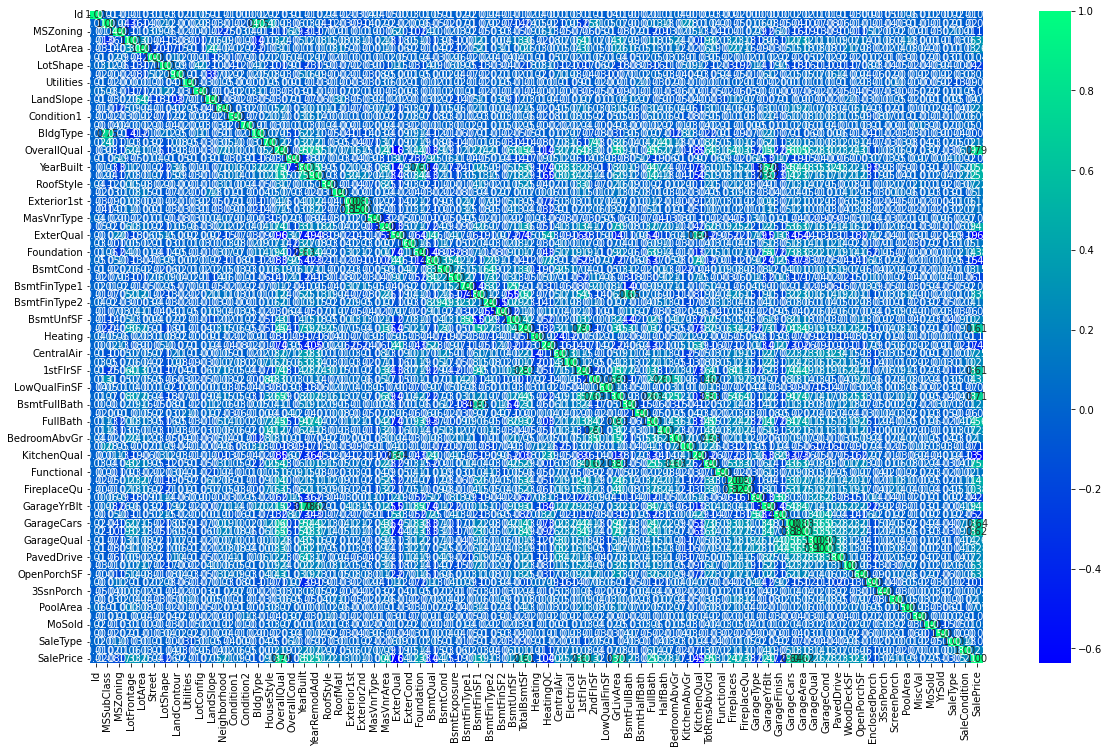

In [28]:
fig , ax = plt.subplots(figsize = (20,12))

ax = sns.heatmap(df_train.corr(), annot =True, fmt='.2f', cmap ='winter' ) #,linewidths=0.5)

# Baseline Prediction using Random forest regressor

### Splitting and preparing the data

In [29]:
X = df_train.drop('SalePrice',axis =1)
y = df_train.SalePrice

In [30]:
# !pip install sklearn

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [32]:
X_train , X_test , y_train, y_test = train_test_split ( X, y , test_size=0.2)

In [33]:
model = RandomForestRegressor()

In [34]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
y_pred = model.predict(X_test)


In [37]:
model.score(X_test,y_test)

0.8135856466983402

In [38]:
from sklearn.metrics import r2_score , mean_absolute_error ,mean_squared_error  , mean_squared_log_error 

In [39]:
rmsle = mean_squared_log_error(y_test, y_pred, squared=False)
rmsle

0.15461215202123427

In [40]:
rms = mean_squared_error(y_test, y_pred, squared=False)
rms

31994.492204339058

In [41]:
r2 = r2_score(y_test,y_pred)
r2

0.8135856466983402

In [42]:
mae = mean_absolute_error(y_test,y_pred)
mae

18918.21332191781

In [43]:
mse =mean_squared_error(y_test,y_pred)
mse

1023647531.4135127

In [74]:
# pd.read_csv("sample_submission.csv")

### Baseline Prediction gives RMSLE of 0.14220376172399138

# Testing for test data set 

In [81]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,2,4,4,1,5,...,0,0,0,120,0,0,6,2010,9,5
1,1462,20,4,81.0,14267,2,1,4,1,1,...,36,0,0,0,0,12500,6,2010,9,5
2,1463,60,4,74.0,13830,2,1,4,1,5,...,34,0,0,0,0,0,3,2010,9,5
3,1464,60,4,78.0,9978,2,1,4,1,5,...,36,0,0,0,0,0,6,2010,9,5
4,1465,120,4,43.0,5005,2,1,2,1,5,...,82,0,0,144,0,0,1,2010,9,5


In [82]:
y_pred2 = model.predict(df_test)
y_pred2

array([124464.  , 155791.  , 169770.28, ..., 157048.16, 107193.03,
       224768.07])

In [83]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = y_pred2
df_preds

,Id,SalePrice
0,1461,124464.00
1,1462,155791.00
2,1463,169770.28
3,1464,186369.64
4,1465,202985.80
...,...,...
1454,2915,83773.00
1455,2916,88085.50
1456,2917,157048.16
1457,2918,107193.03


In [84]:
df_preds.to_csv("To_be_Submited.csv",index =False)

# Tuning Hyperparameters

In [85]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [95]:
##### grid = { 'n_estimators' : np.arange(50,500,10),
#         'max_depth' : [None,5,10,20,30,50],
#         'max_features' : [0.5,1,1,5,'auto','sqrt'],
#         'min_samples_split' : [1,2,4,6,8],
#         'min_samples_leaf' : [1,2,4,6 ,8]
#        }

grid = { 'n_estimators' : [300,290],
        'max_depth' : [30],
        'max_features' : [0.5],
        'min_samples_split' : [4,6],
        'min_samples_leaf' : [1]
       }

In [96]:
X =df_train.drop('SalePrice',axis =1)

In [97]:
y=df_train.SalePrice

In [98]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)


In [101]:
# %%time
model_new =RandomForestRegressor(n_jobs=-1)
reg_model = RandomizedSearchCV(model_new,
                              param_distributions = grid,
                              scoring ='neg_mean_squared_error',
                              n_iter =20,
                              cv=5,
                              verbose =True)

In [102]:
%%time
reg_model.fit(X_train,y_train)

C:\Users\Shashank.Awasthi\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: total: 13.7 s
Wall time: 32.2 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=20,
                   param_distributions={'max_depth': [30],
                                        'max_features': [0.5],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [4, 6],
                                        'n_estimators': [300, 290]},
                   scoring='neg_mean_squared_error', verbose=True)

In [103]:
%%time
# reg_model.fit(X,y)

CPU times: total: 0 ns
Wall time: 0 ns


In [507]:
# reg_model.best_params_

{'n_estimators': 300,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 30}

In [104]:
reg_model.best_params_

{'n_estimators': 290,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 30}

In [105]:
y_pred = reg_model.predict(X_test)

In [106]:
y_pred.shape

(292,)

In [107]:
y_test.shape

(292,)

In [108]:
reg_model.score(X_test,y_test)

-630440895.184287

In [109]:
rmsle = mean_squared_log_error(y_test, y_pred, squared=False)
rmsle

0.14000727054563625

In [110]:
# ideal_model.feature_importances_

In [280]:
# Different hyperparameters for our LogisticRegression model
# log_reg_grid = {"C": np.logspace(-4, 4, 30),
#                 "solver": ["liblinear"]}

# log_grid = { 'n_estimators' : np.arange(250,350,15),
#         'max_depth' : [30,40],
#         'max_features' : [0.5,1],
#         'min_samples_split' : [2,4,6],
#         'min_samples_leaf' : [1,2]
#        }

log_grid = { 'n_estimators' : np.arange(250,350,10),
        'max_depth' : [20,30,40],
        'max_features' : [0.5,1,'auto','sqrt'],
        'min_samples_split' : [2,4,6],
        'min_samples_leaf' : [1,2]
       }

In [45]:
from sklearn.model_selection import GridSearchCV

In [282]:
# Setup grid hyperparameter search for LogisticRegression
# gs_log_reg = GridSearchCV(LogisticRegression(),
#                           param_grid=log_reg_grid,
#                           cv=5,
#                           verbose=True)
# %%time
model_new =RandomForestRegressor(n_jobs=-1)
reg_model = GridSearchCV(model_new,
                              param_grid = log_grid,
                              scoring ='neg_mean_squared_error',
                              cv=5,
                              verbose =2)

In [86]:
%%time
reg_model.fit(X_train, y_train);

In [112]:
reg_model.best_params_

{'n_estimators': 290,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 30}

In [113]:
y_pred = reg_model.predict(X_test)

In [114]:
y_pred.shape

(292,)

In [115]:
y_test.shape

(292,)

In [116]:
reg_model.score(X_test,y_test)

-630440895.184287

In [117]:
rmsle = mean_squared_log_error(y_test, y_pred, squared=False)
rmsle

0.14000727054563628

In [449]:
model = RandomForestRegressor(max_depth= 35,
 max_features= 0.5,
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 300)

In [450]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=35, max_features=0.5, min_samples_split=5,
                      n_estimators=300)

In [451]:
# model.get_params()

In [452]:
y_pred = model.predict(X_test)


In [453]:
# model.score(X_test,y_test)

In [454]:
# from sklearn.metrics import r2_score , mean_absolute_error ,mean_squared_error  , mean_squared_log_error 

In [119]:
rmsle = mean_squared_log_error(y_test, y_pred, squared=False)
rmsle

0.14000727054563628

# Rmsle of 0.1280677517477516

In [120]:
y_pred3 = reg_model.predict(df_test)
y_pred3

array([127767.26747525, 154667.69117406, 176723.69897099, ...,
       156128.54495074, 117890.32207991, 232136.21459223])

In [121]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = y_pred3
df_preds

,Id,SalePrice
0,1461,127767.267475
1,1462,154667.691174
2,1463,176723.698971
3,1464,184487.056564
4,1465,202625.795369
...,...,...
1454,2915,86047.292094
1455,2916,85849.633514
1456,2917,156128.544951
1457,2918,117890.322080


In [123]:
df_preds.to_csv("To_be_Submited3.csv",index =False)

In [124]:
# pip install xgboost

In [468]:
modelxg = XGBRegressor()

In [469]:
modelxg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [481]:
# X, y = df2[:, :-1], df2[:, -1]

In [482]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,4,65.0,8450,2,4,4,1,5,...,61,0,0,0,0,0,2,2008,9,5
1,2,20,4,80.0,9600,2,4,4,1,3,...,0,0,0,0,0,0,5,2007,9,5
2,3,60,4,68.0,11250,2,1,4,1,5,...,42,0,0,0,0,0,9,2008,9,5
3,4,70,4,60.0,9550,2,1,4,1,1,...,35,272,0,0,0,0,2,2006,9,1
4,5,60,4,84.0,14260,2,1,4,1,3,...,84,0,0,0,0,0,12,2008,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,4,62.0,7917,2,4,4,1,5,...,40,0,0,0,0,0,8,2007,9,5
1456,1457,20,4,85.0,13175,2,4,4,1,5,...,0,0,0,0,0,0,2,2010,9,5
1457,1458,70,4,66.0,9042,2,4,4,1,5,...,60,0,0,0,0,2500,5,2010,9,5
1458,1459,20,4,68.0,9717,2,4,4,1,5,...,0,112,0,0,0,0,4,2010,9,5


In [487]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold

# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model

In [485]:
# scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


In [490]:
modelxg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [2]:
yhat = modelxg.predict(X_test)
yhat

In [494]:
rmsle = mean_squared_log_error(y_test, yhat, squared=False)
rmsle

0.13416185625961863

In [495]:
y_pred4 = modelxg.predict(df_test)
y_pred4

array([128067.01, 166826.81, 173378.02, ..., 163690.14, 112912.42,
       213866.73], dtype=float32)

In [496]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = y_pred4
df_preds

,Id,SalePrice
0,1461,128067.007812
1,1462,166826.812500
2,1463,173378.015625
3,1464,187167.843750
4,1465,189266.390625
...,...,...
1454,2915,88466.296875
1455,2916,81246.750000
1456,2917,163690.140625
1457,2918,112912.421875


In [497]:
df_preds.to_csv("To_be_Submited3.csv",index =False)

In [161]:
# pip install catboost

# Catboost

In [46]:
import catboost as cb

In [47]:
X = df_train.drop('SalePrice',axis =1)
y = df_train.SalePrice

In [48]:
# !pip install sklearn

In [49]:
X_train , X_test , y_train, y_test = train_test_split ( X, y , test_size=0.2)

In [50]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [3]:
%%time
model.fit(X_train,y_train)

In [52]:
pred = model.predict(X_test)

In [53]:
model.get_params()

{'loss_function': 'RMSE'}

In [54]:
rmsle = mean_squared_log_error(y_test, pred, squared=False)
rmsle

0.12222456053532159

In [68]:
y_pred6 = model.predict(df_test)
y_pred6

array([122970.64414013, 162492.35384246, 185293.22270865, ...,
       174474.10077077, 121578.60242833, 236954.47325778])

In [69]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = y_pred6
df_preds

,Id,SalePrice
0,1461,122970.644140
1,1462,162492.353842
2,1463,185293.222709
3,1464,192624.924323
4,1465,186551.528402
...,...,...
1454,2915,79620.411968
1455,2916,82867.529392
1456,2917,174474.100771
1457,2918,121578.602428


In [70]:
df_preds.to_csv("To_be_Submited6.csv",index =False)

In [ ]:
# grid = {'depth':[3,1,2,6,4,5,7,8,9,10],
#           'iterations':[250,100,500,1000],
#           'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
#           'l2_leaf_reg':[3,1,5,10,100],
#           'border_count':[32,5,10,20,50,100,200],
#           'ctr_border_count':[50,5,10,20,100,200],
#           'thread_count':4}

In [55]:
cbc = cb.CatBoostRegressor(loss_function='RMSE')

In [76]:
#create the grid
grid = {'learning_rate':[0.2,0.15],'max_depth': [6],'n_estimators':[ 500],
       'border_count':[560]
         }

In [4]:
%%time
#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='neg_mean_squared_log_error', cv = 5,verbose =True)

#fit the model
gscv.fit(X_train,y_train)

In [78]:
pred = gscv.predict(X_test)

In [79]:
gscv.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__loss_function': 'RMSE',
 'estimator': <catboost.core.CatBoostRegressor at 0x162edc94c10>,
 'n_jobs': None,
 'param_grid': {'learning_rate': [0.2, 0.15],
  'max_depth': [6],
  'n_estimators': [500],
  'border_count': [560]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'neg_mean_squared_log_error',
 'verbose': True}

In [80]:
gscv.best_params_

{'border_count': 560,
 'learning_rate': 0.15,
 'max_depth': 6,
 'n_estimators': 500}

In [81]:
rmsle = mean_squared_log_error(y_test, pred, squared=False)
rmsle

0.12737449327531963

In [82]:
rmsle = mean_squared_log_error(y_test, pred, squared=False)
rmsle

0.12737449327531963

In [83]:
y_pred8 = gscv.predict(df_test)
y_pred8

array([120173.34694748, 159396.3845883 , 184207.07299506, ...,
       158213.53154996, 120351.19333324, 229746.36414946])

In [84]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = y_pred8
df_preds

,Id,SalePrice
0,1461,120173.346947
1,1462,159396.384588
2,1463,184207.072995
3,1464,198128.611103
4,1465,186057.364374
...,...,...
1454,2915,86321.875929
1455,2916,87442.796301
1456,2917,158213.531550
1457,2918,120351.193333


In [85]:
df_preds.to_csv("To_be_Submited9.csv",index =False)

In [66]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [5]:
model.fit(X,y)